In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# confused on the amount of zeros

df = pd.read_csv('Toyota_Data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
df.head(10)

,Adj Close,Close,High,Low,Open,Volume,fed_funds_effective_rate,T10Y2Y,nikkei225_close_in_yen,japan_basic_discount_loan_rate,sp500_close,sp500_volume,monday_flag,tuesday_flag,wednesday_flag,thursday_flag,friday_flag
Date,,,,,,,,,,,,,,,,,
1980-03-17,2.296798,3.291227,3.344743,3.291227,0.000000,41109,16.75,-2.24,6562.66,7.25,102.26,20566667,0,0,0,0,0
1980-03-18,2.306134,3.304606,3.358122,3.304606,0.000000,9343,15.73,-2.02,6578.21,7.25,104.10,26300000,1,0,0,0,0
1980-03-19,2.306134,3.304606,3.304606,3.304606,3.304606,0,15.59,-1.98,6584.76,9.00,104.31,20288889,0,1,0,0,0
1980-03-20,2.306134,3.304606,3.358122,3.304606,0.000000,10277,16.83,-2.41,NaN,9.00,103.12,18100000,0,0,1,0,0
1980-03-21,2.362154,3.384880,3.438396,3.384880,0.000000,8409,17.68,-2.27,6571.77,9.00,102.31,17900000,0,0,0,1,0
1980-03-24,2.371490,3.398259,3.451775,3.398259,0.000000,2803,17.92,-2.19,6567.25,9.00,99.28,21794444,0,0,0,0,1
1980-03-25,2.352816,3.371501,3.425017,3.371501,0.000000,27095,17.72,-2.09,6531.26,9.00,99.19,24327778,1,0,0,0,0
1980-03-26,2.352816,3.371501,3.425017,3.371501,0.000000,1869,18.96,-2.23,6535.88,9.00,98.68,20761111,0,1,0,0,0
1980-03-27,2.324807,3.331364,3.384880,3.331364,0.000000,14015,19.04,-2.14,6481.02,9.00,98.22,35377778,0,0,1,0,0


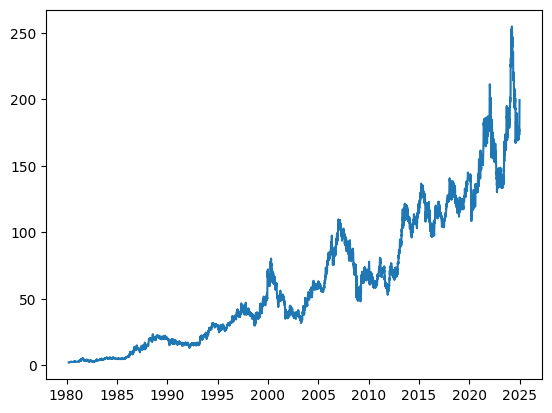

In [31]:
plt.plot(df['Adj Close'])
plt.show()

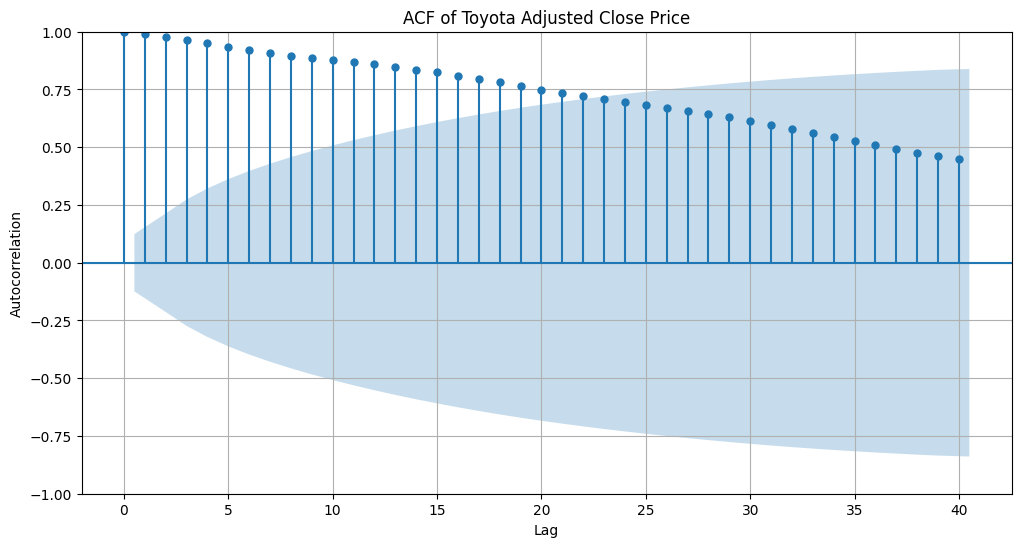

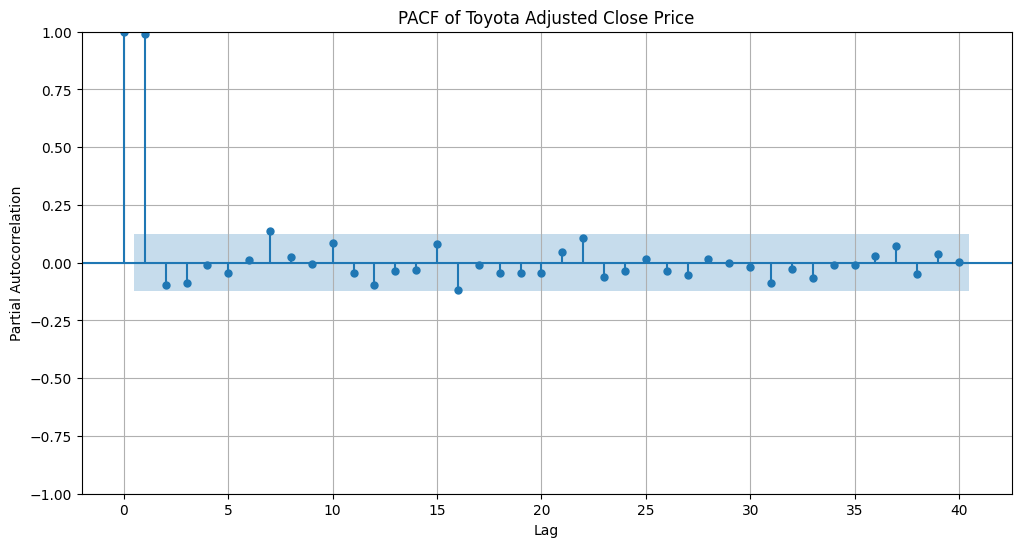

In [32]:
# acf and pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


start_date = '2024-01-01'
end_date = '2024-12-31'
filtered_df = df[(df.index >= start_date) & (df.index <= end_date)]

filtered_toyota_adj_close = filtered_df['Adj Close'].dropna()
toyota_adj_close = df['Adj Close'].dropna()

### ACF ###
plt.figure(figsize=(12, 6))
plot_acf(filtered_toyota_adj_close, lags=40, ax=plt.gca()) 
plt.title('ACF of Toyota Adjusted Close Price')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

### PACF ###
plt.figure(figsize=(12, 6))
plot_pacf(filtered_toyota_adj_close, lags=40, ax=plt.gca())
plt.title('PACF of Toyota Adjusted Close Price')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()

In [33]:
# Confirming data as it is on Yahoo Finance, still unsure about the amount of 0s here

import yfinance as yf

ticker = yf.Ticker("TM")
historical_data = ticker.history(period="max")

test = pd.DataFrame(historical_data)
test

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-03-17 00:00:00-05:00,0.000000,2.334143,2.296797,2.296797,41109,0.0,0.0
1980-03-18 00:00:00-05:00,0.000000,2.343480,2.306134,2.306134,9343,0.0,0.0
1980-03-19 00:00:00-05:00,2.306134,2.306134,2.306134,2.306134,0,0.0,0.0
1980-03-20 00:00:00-05:00,0.000000,2.343480,2.306134,2.306134,10277,0.0,0.0
1980-03-21 00:00:00-05:00,0.000000,2.399499,2.362153,2.362153,8409,0.0,0.0
...,...,...,...,...,...,...,...
2025-04-01 00:00:00-04:00,175.800003,175.800003,173.369995,174.419998,474600,0.0,0.0
2025-04-02 00:00:00-04:00,176.110001,178.300003,175.240005,177.309998,307900,0.0,0.0
2025-04-03 00:00:00-04:00,170.490005,171.539993,167.500000,168.070007,614100,0.0,0.0


In [34]:
df.describe()

,Adj Close,Close,High,Low,Open,Volume,fed_funds_effective_rate,T10Y2Y,nikkei225_close_in_yen,japan_basic_discount_loan_rate,sp500_close,sp500_volume,monday_flag,tuesday_flag,wednesday_flag,thursday_flag,friday_flag
count,11291.000000,11291.000000,11291.000000,11291.000000,11291.000000,1.129100e+04,11291.000000,11291.000000,10745.000000,11291.000000,11291.000000,1.129100e+04,11291.000000,11291.000000,11291.000000,11291.000000,11291.000000
mean,63.586275,72.057776,72.478879,71.646418,67.955424,2.146604e+05,4.391936,0.902177,17489.550511,1.687379,1365.554280,1.103008e+09,0.189000,0.205031,0.204942,0.201222,0.199717
std,52.272225,51.295776,51.552662,50.976716,55.851523,3.874256e+05,3.919802,0.910934,7602.248403,2.149653,1266.188038,1.066588e+09,0.391526,0.403742,0.403677,0.400932,0.399805
min,2.259452,3.237711,3.237711,3.237711,0.000000,0.000000e+00,0.040000,-2.410000,6475.930000,0.100000,98.220000,8.327778e+06,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.224636,27.548208,27.735613,27.548208,0.000000,1.350000e+04,0.990000,0.190000,10949.090000,0.300000,376.780000,1.071028e+08,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.583900,66.040001,66.650002,65.440002,66.000000,9.100000e+04,4.330000,0.840000,16755.320000,0.500000,1115.050000,7.221111e+08,0.000000,0.000000,0.000000,0.000000,0.000000
75%,104.705669,114.295002,114.895000,113.625000,114.294998,2.923000e+05,6.220000,1.540000,21584.500000,2.500000,1709.790000,2.007832e+09,0.000000,0.000000,0.000000,0.000000,0.000000
max,254.770004,254.770004,255.229996,253.589996,255.000000,1.858270e+07,22.360000,2.910000,42224.020000,9.000000,6090.270000,6.423401e+09,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11291 entries, 1980-03-17 to 2024-12-27
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Adj Close                       11291 non-null  float64
 1   Close                           11291 non-null  float64
 2   High                            11291 non-null  float64
 3   Low                             11291 non-null  float64
 4   Open                            11291 non-null  float64
 5   Volume                          11291 non-null  int64  
 6   fed_funds_effective_rate        11291 non-null  float64
 7   T10Y2Y                          11291 non-null  float64
 8   nikkei225_close_in_yen          10745 non-null  float64
 9   japan_basic_discount_loan_rate  11291 non-null  float64
 10  sp500_close                     11291 non-null  float64
 11  sp500_volume                    11291 non-null  int64  
 12  monday_flag    

In [36]:
corrplot = df.corr()
corrplot

,Adj Close,Close,High,Low,Open,Volume,fed_funds_effective_rate,T10Y2Y,nikkei225_close_in_yen,japan_basic_discount_loan_rate,sp500_close,sp500_volume,monday_flag,tuesday_flag,wednesday_flag,thursday_flag,friday_flag
Adj Close,1.000000,0.991369,0.991281,0.991450,0.979054,0.281017,-0.577470,-0.110054,0.457214,-0.642685,0.955161,0.782419,-0.004693,0.001346,0.000299,0.001538,0.001653
Close,0.991369,1.000000,0.999953,0.999953,0.991121,0.301755,-0.606115,-0.094482,0.431878,-0.702880,0.930072,0.781262,-0.004929,0.001277,0.000410,0.001642,0.001774
High,0.991281,0.999953,1.000000,0.999924,0.991119,0.303710,-0.606315,-0.094085,0.431633,-0.702781,0.930011,0.782820,-0.005012,0.001502,0.000509,0.001487,0.001684
Low,0.991450,0.999953,0.999924,1.000000,0.991014,0.299151,-0.605573,-0.095354,0.433252,-0.702389,0.930271,0.779561,-0.004958,0.001150,0.000318,0.001652,0.002013
Open,0.979054,0.991121,0.991119,0.991014,1.000000,0.312267,-0.623503,-0.070743,0.340002,-0.729156,0.917007,0.788213,-0.004799,0.001321,0.000437,0.001526,0.001664
Volume,0.281017,0.301755,0.303710,0.299151,0.312267,1.000000,-0.369597,0.274240,-0.130657,-0.302085,0.186159,0.547126,-0.002490,0.022071,0.009234,-0.009502,-0.019546
fed_funds_effective_rate,-0.577470,-0.606115,-0.606315,-0.605573,-0.623503,-0.369597,1.000000,-0.593314,-0.049683,0.786693,-0.475584,-0.662691,0.001181,-0.001199,0.002331,-0.004504,0.001518
T10Y2Y,-0.110054,-0.094482,-0.094085,-0.095354,-0.070743,0.274240,-0.593314,1.000000,-0.375384,-0.186196,-0.200800,0.173150,0.004653,0.004070,0.003074,0.003809,-0.014825
nikkei225_close_in_yen,0.457214,0.431878,0.431633,0.433252,0.340002,-0.130657,-0.049683,-0.375384,1.000000,-0.147293,0.527224,0.106222,0.000219,0.000913,0.000762,-0.001070,-0.000512
japan_basic_discount_loan_rate,-0.642685,-0.702880,-0.702781,-0.702389,-0.729156,-0.302085,0.786693,-0.186196,-0.147293,1.000000,-0.561858,-0.609803,0.004881,-0.001065,-0.000811,-0.001149,-0.002308


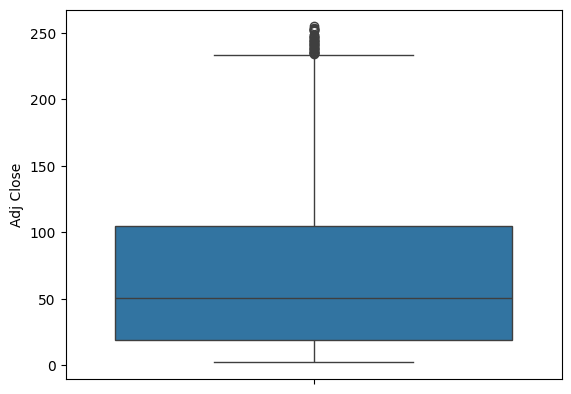

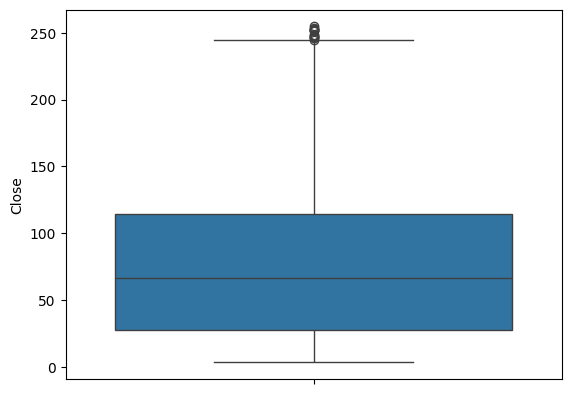

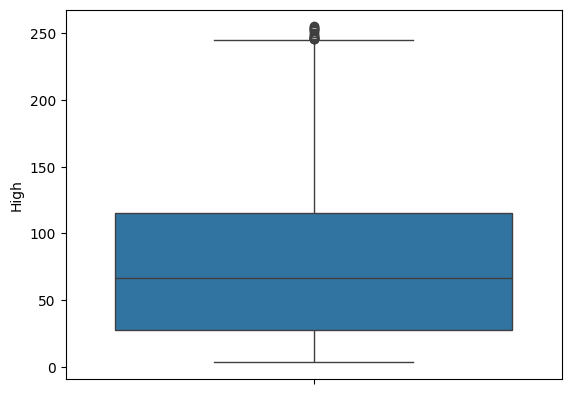

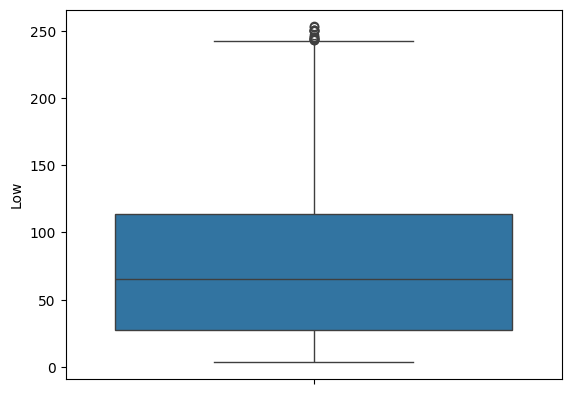

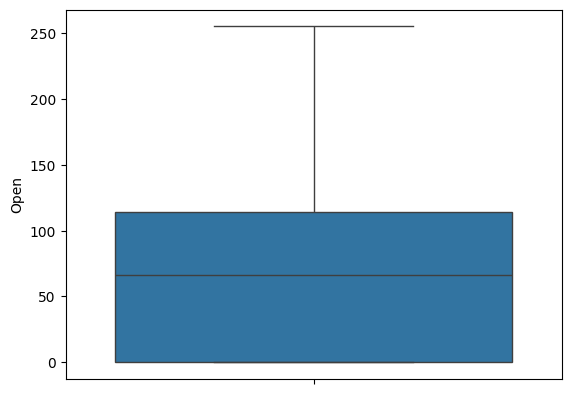

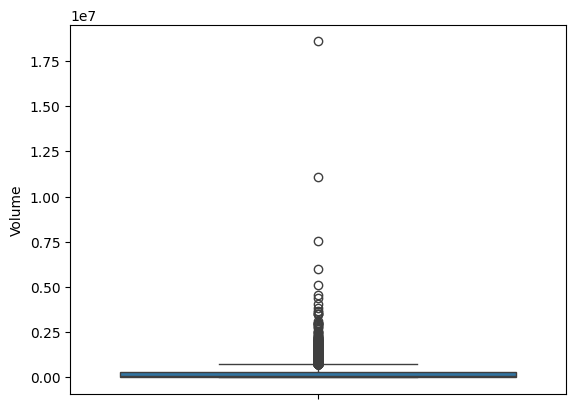

In [37]:
sns.boxplot(df['Adj Close'])
plt.show()

sns.boxplot(df['Close'])
plt.show()

sns.boxplot(df['High'])
plt.show()

sns.boxplot(df['Low'])
plt.show()

sns.boxplot(df['Open'])
plt.show()

sns.boxplot(df['Volume'])
plt.show()

In [38]:
df['TargetNextClose'] = df['Adj Close'].shift(-1)
df.head()

,Adj Close,Close,High,Low,Open,Volume,fed_funds_effective_rate,T10Y2Y,nikkei225_close_in_yen,japan_basic_discount_loan_rate,sp500_close,sp500_volume,monday_flag,tuesday_flag,wednesday_flag,thursday_flag,friday_flag,TargetNextClose
Date,,,,,,,,,,,,,,,,,,
1980-03-17,2.296798,3.291227,3.344743,3.291227,0.000000,41109,16.75,-2.24,6562.66,7.25,102.26,20566667,0,0,0,0,0,2.306134
1980-03-18,2.306134,3.304606,3.358122,3.304606,0.000000,9343,15.73,-2.02,6578.21,7.25,104.10,26300000,1,0,0,0,0,2.306134
1980-03-19,2.306134,3.304606,3.304606,3.304606,3.304606,0,15.59,-1.98,6584.76,9.00,104.31,20288889,0,1,0,0,0,2.306134
1980-03-20,2.306134,3.304606,3.358122,3.304606,0.000000,10277,16.83,-2.41,NaN,9.00,103.12,18100000,0,0,1,0,0,2.362154
1980-03-21,2.362154,3.384880,3.438396,3.384880,0.000000,8409,17.68,-2.27,6571.77,9.00,102.31,17900000,0,0,0,1,0,2.371490


In [39]:
# Creating 7 day moving average of adj_close to capture short term trend
df['MA_5_adj_close'] = df['Adj Close'].rolling(window=5).mean() 

# creating 7 day moving average of standard deviation of adj_close
df['5_day_SD'] = df['Adj Close'].rolling(window=5).std()


# Adding in Technical indicators RSI, MACD, and Bollinger bands
import pandas_ta as ta
# RSI
df['RSI'] = ta.rsi(df['Adj Close'], length=5)
# MACD: This will be 2 columns, one is the MACD(diff of fast and slow EMA)
# and the other is the signal line (the EMA of the MACD line)
macd = ta.macd(df['Adj Close'], fast=5, slow=15, signal=7)
df['MACD'] = macd['MACD_5_15_7']        # MACD line
df['Signal_Line'] = macd['MACDs_5_15_7']  # Signal line
# Bollinger Bands: Creates 3 lines, lower, middle and upper bands
# Middle band is 7 day SMA of adj_close and the upper/lower bands is middle +- 2*SD
bollinger = ta.bbands(df['Adj Close'], length=7)
df['BB_Upper'] = bollinger['BBU_7_2.0']  # Upper Band
df['BB_Middle'] = bollinger['BBM_7_2.0'] # Middle Band
df['BB_Lower'] = bollinger['BBL_7_2.0']  # Lower Band



df.head()

,Adj Close,Close,High,Low,Open,Volume,fed_funds_effective_rate,T10Y2Y,nikkei225_close_in_yen,japan_basic_discount_loan_rate,...,friday_flag,TargetNextClose,MA_5_adj_close,5_day_SD,RSI,MACD,Signal_Line,BB_Upper,BB_Middle,BB_Lower
Date,,,,,,,,,,,,,,,,,,,,,
1980-03-17,2.296798,3.291227,3.344743,3.291227,0.000000,41109,16.75,-2.24,6562.66,7.25,...,0,2.306134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-03-18,2.306134,3.304606,3.358122,3.304606,0.000000,9343,15.73,-2.02,6578.21,7.25,...,0,2.306134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-03-19,2.306134,3.304606,3.304606,3.304606,3.304606,0,15.59,-1.98,6584.76,9.00,...,0,2.306134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-03-20,2.306134,3.304606,3.358122,3.304606,0.000000,10277,16.83,-2.41,NaN,9.00,...,0,2.362154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-03-21,2.362154,3.384880,3.438396,3.384880,0.000000,8409,17.68,-2.27,6571.77,9.00,...,0,2.371490,2.315471,0.026408,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
corr2 = df.corr()
corr2

,Adj Close,Close,High,Low,Open,Volume,fed_funds_effective_rate,T10Y2Y,nikkei225_close_in_yen,japan_basic_discount_loan_rate,...,friday_flag,TargetNextClose,MA_5_adj_close,5_day_SD,RSI,MACD,Signal_Line,BB_Upper,BB_Middle,BB_Lower
Adj Close,1.000000,0.991369,0.991281,0.991450,0.979054,0.281017,-0.577470,-0.110054,0.457214,-0.642685,...,0.001653,0.999714,0.999650,0.669677,0.027232,0.080709,0.086808,0.999134,0.999461,0.999040
Close,0.991369,1.000000,0.999953,0.999953,0.991121,0.301755,-0.606115,-0.094482,0.431878,-0.702880,...,0.001774,0.991044,0.990964,0.671326,0.030156,0.085230,0.091737,0.990690,0.990747,0.990047
High,0.991281,0.999953,1.000000,0.999924,0.991119,0.303710,-0.606315,-0.094085,0.431633,-0.702781,...,0.001684,0.990966,0.990965,0.673188,0.027903,0.083250,0.090334,0.990767,0.990763,0.989999
Low,0.991450,0.999953,0.999924,1.000000,0.991014,0.299151,-0.605573,-0.095354,0.433252,-0.702389,...,0.002013,0.991138,0.991089,0.669319,0.029539,0.085957,0.092752,0.990737,0.990865,0.990240
Open,0.979054,0.991121,0.991119,0.991014,1.000000,0.312267,-0.623503,-0.070743,0.340002,-0.729156,...,0.001664,0.978770,0.978817,0.663395,0.026524,0.079518,0.086694,0.978563,0.978627,0.977944
Volume,0.281017,0.301755,0.303710,0.299151,0.312267,1.000000,-0.369597,0.274240,-0.130657,-0.302085,...,-0.019546,0.280783,0.282012,0.343402,-0.034071,-0.077006,-0.069677,0.287672,0.282589,0.277013
fed_funds_effective_rate,-0.577470,-0.606115,-0.606315,-0.605573,-0.623503,-0.369597,1.000000,-0.593314,-0.049683,0.786693,...,0.001518,-0.577642,-0.577370,-0.377713,-0.021912,-0.026990,-0.029542,-0.576480,-0.577338,-0.577800
T10Y2Y,-0.110054,-0.094482,-0.094085,-0.095354,-0.070743,0.274240,-0.593314,1.000000,-0.375384,-0.186196,...,-0.014825,-0.109955,-0.111759,-0.081665,0.020261,-0.003554,-0.004482,-0.113078,-0.112631,-0.112073
nikkei225_close_in_yen,0.457214,0.431878,0.431633,0.433252,0.340002,-0.130657,-0.049683,-0.375384,1.000000,-0.147293,...,-0.000512,0.456666,0.456735,0.305134,0.007395,0.048340,0.053170,0.456447,0.456408,0.456023
japan_basic_discount_loan_rate,-0.642685,-0.702880,-0.702781,-0.702389,-0.729156,-0.302085,0.786693,-0.186196,-0.147293,1.000000,...,-0.002308,-0.642784,-0.642709,-0.445698,-0.004165,-0.032569,-0.036526,-0.642914,-0.642745,-0.642075


In [41]:
from statsforecast import StatsForecast
from sklearn.metrics import root_mean_squared_error

In [42]:
df_long = df.copy()
df_long.reset_index(inplace=True)
df_long['unique_id'] = "Toyota"
df_long = df_long.rename(columns={"Date": "ds", "TargetNextClose": "y"})
df_long = df_long[["ds", "unique_id", "y"]]

print(df_long.head())


          ds unique_id         y
0 1980-03-17    Toyota  2.306134
1 1980-03-18    Toyota  2.306134
2 1980-03-19    Toyota  2.306134
3 1980-03-20    Toyota  2.362154
4 1980-03-21    Toyota  2.371490


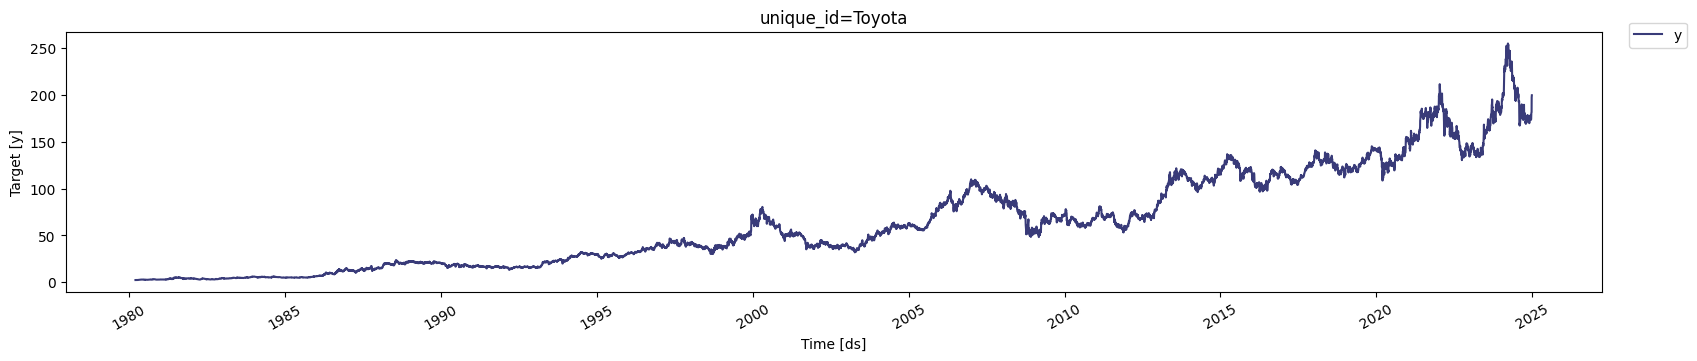

In [43]:
StatsForecast.plot(df_long)

In [44]:
df_long['ds'] = pd.to_datetime(df_long['ds'], format='%Y-%m')
split_date = '2016-01-01'
df_long['split'] = np.where(df_long.ds < split_date, 'train', 'test')
df_long['unique_id'] = 0
train_data = df_long[df_long['split']=='train'].drop('split', axis=1).copy()
test_data = df_long[df_long['split']=='test'].drop('split', axis=1).copy()
df_long = df_long.dropna()
df_long

,ds,unique_id,y,split
0,1980-03-17,0,2.306134,train
1,1980-03-18,0,2.306134,train
2,1980-03-19,0,2.306134,train
3,1980-03-20,0,2.362154,train
4,1980-03-21,0,2.371490,train
...,...,...,...,...
11285,2024-12-19,0,178.169998,test
11286,2024-12-20,0,180.449997,test
11287,2024-12-23,0,181.429993,test
11288,2024-12-24,0,197.360001,test


In [45]:
df_long.describe()

,ds,unique_id,y
count,11290,11290.0,11290.000000
mean,2002-07-27 23:24:17.218777856,0.0,63.591704
min,1980-03-17 00:00:00,0.0,2.259452
25%,1991-05-15 06:00:00,0.0,19.224636
50%,2002-07-24 12:00:00,0.0,50.589249
75%,2013-10-08 18:00:00,0.0,104.708506
max,2024-12-26 00:00:00,0.0,254.770004
std,NaN,0.0,52.271357


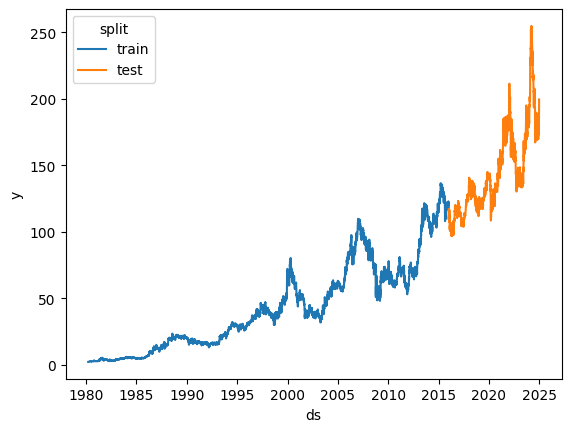

In [46]:
sns.lineplot(df_long, x='ds', y='y', hue='split')
plt.show()

In [47]:
from statsforecast.models import (
    HoltWinters,
    CrostonClassic as Croston, 
    HistoricAverage,
    DynamicOptimizedTheta as DOT,
    SeasonalNaive
)

In [48]:
models = [
    HoltWinters(),
    Croston(),
    SeasonalNaive(season_length=24),
    HistoricAverage(),
    DOT(season_length=24)
]

In [49]:
sf = StatsForecast( 
    models=models,
    freq='D', 
    fallback_model = SeasonalNaive(season_length=7),
    n_jobs=-1,
)

In [50]:
forecasts_df = sf.forecast(df=train_data, h=48, level=[90])

forecasts_df.head()

,unique_id,ds,HoltWinters,HoltWinters-lo-90,HoltWinters-hi-90,CrostonClassic,CrostonClassic-lo-90,CrostonClassic-hi-90,SeasonalNaive,SeasonalNaive-lo-90,SeasonalNaive-hi-90,HistoricAverage,HistoricAverage-lo-90,HistoricAverage-hi-90,DynamicOptimizedTheta,DynamicOptimizedTheta-lo-90,DynamicOptimizedTheta-hi-90
0,0,2016-01-01,122.923843,119.358226,126.489461,122.923843,119.358226,126.489461,120.284569,114.201949,126.367188,43.294623,-11.511345,98.100591,117.603484,116.305682,119.240438
1,0,2016-01-02,121.589699,118.024081,125.155316,121.589699,118.024081,125.155316,121.734718,115.652099,127.817338,43.294623,-11.511345,98.100591,117.561744,115.600886,119.609595
2,0,2016-01-03,120.332909,116.767291,123.898526,120.332909,116.767291,123.898526,121.560699,115.478080,127.643319,43.294623,-11.511345,98.100591,117.644671,114.800148,120.069871
3,0,2016-01-04,120.613274,117.047656,124.178891,120.613274,117.047656,124.178891,120.574608,114.491988,126.657227,43.294623,-11.511345,98.100591,117.585908,114.709641,120.061177
4,0,2016-01-05,119.124458,115.558841,122.690076,119.124458,115.558841,122.690076,121.715385,115.632766,127.798005,43.294623,-11.511345,98.100591,117.557884,114.598490,120.550854


In [51]:
sf.fit(df=train_data,
       id_col='unique_id',
       time_col='ds',
       target_col='y',
       )

y_pred_all = sf.predict(h=len(test_data))

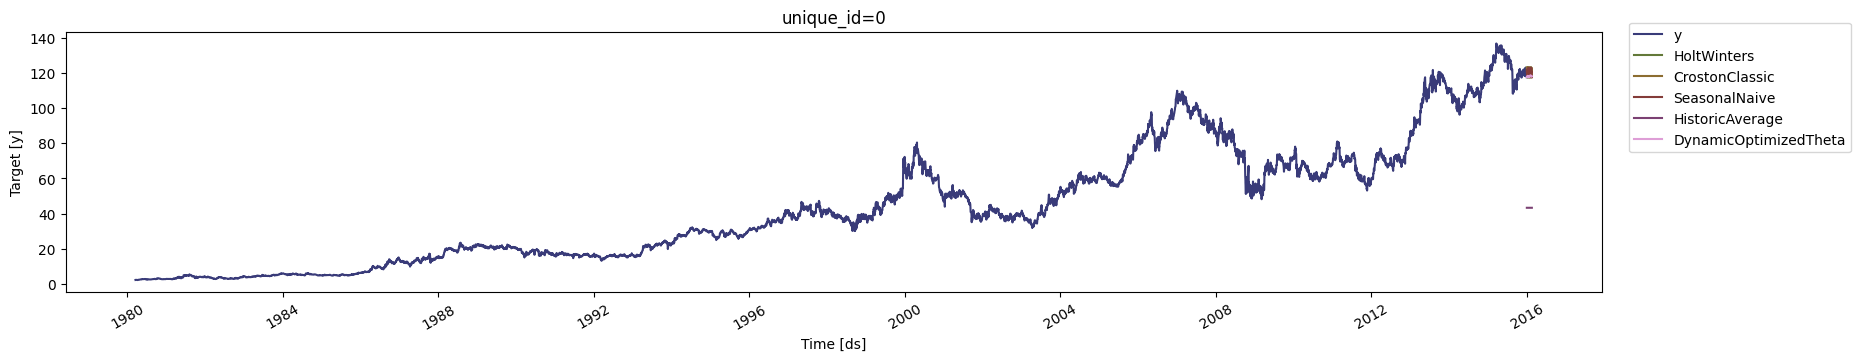

In [52]:
sf.plot(train_data,forecasts_df)

In [53]:
y_pred_all

,unique_id,ds,HoltWinters,CrostonClassic,SeasonalNaive,HistoricAverage,DynamicOptimizedTheta
0,0,2016-01-01,122.923843,120.00075,120.284569,43.294623,117.603484
1,0,2016-01-02,121.589699,120.00075,121.734718,43.294623,117.561744
2,0,2016-01-03,120.332909,120.00075,121.560699,43.294623,117.644671
3,0,2016-01-04,120.613274,120.00075,120.574608,43.294623,117.585908
4,0,2016-01-05,119.124458,120.00075,121.715385,43.294623,117.557884
...,...,...,...,...,...,...,...
2257,0,2022-03-07,120.613274,120.00075,121.734718,43.294623,146.266477
2258,0,2022-03-08,119.124458,120.00075,121.560699,43.294623,146.368645
2259,0,2022-03-09,118.950440,120.00075,120.574608,43.294623,146.294527
2260,0,2022-03-10,117.422958,120.00075,121.715385,43.294623,146.258652


In [54]:
y_true = test_data['y']
y_pred_hw = y_pred_all['HoltWinters']
y_pred_cc = y_pred_all['CrostonClassic']
y_pred_sn = y_pred_all['SeasonalNaive']
y_pred_ha = y_pred_all['HistoricAverage']
y_pred_dot = y_pred_all['DynamicOptimizedTheta']

""" print(f"Holt Winters MSE: {root_mean_squared_error(y_true, y_pred_hw)}")
print(f"Croston Classic MSE: {root_mean_squared_error(y_true, y_pred_cc)}")
print(f"Seasonal Naive MSE: {root_mean_squared_error(y_true, y_pred_sn)}")
print(f"Historic Average MSE: {root_mean_squared_error(y_true, y_pred_ha)}")
print(f"Dynamic Optimized Theta MSE: {root_mean_squared_error(y_true, y_pred_dot)}") """

' print(f"Holt Winters MSE: {root_mean_squared_error(y_true, y_pred_hw)}")\nprint(f"Croston Classic MSE: {root_mean_squared_error(y_true, y_pred_cc)}")\nprint(f"Seasonal Naive MSE: {root_mean_squared_error(y_true, y_pred_sn)}")\nprint(f"Historic Average MSE: {root_mean_squared_error(y_true, y_pred_ha)}")\nprint(f"Dynamic Optimized Theta MSE: {root_mean_squared_error(y_true, y_pred_dot)}") '

Of the StatsForecast models that I ran, Dynamic Optimized Theta is by far the best model here as measured by MSE. With that being said, the MSE is still very high, indicating that this is not a good model to use. This is so because the mean is only around 63. If we take the RMSE, which is 28, this is a significant proportion of the mean, which is not a strong model.

XGBoost Model

In [55]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error
from xgboost import XGBRegressor

In [56]:
df2 = df.ffill()

In [71]:
df2

,Adj Close,Close,High,Low,Open,Volume,fed_funds_effective_rate,T10Y2Y,nikkei225_close_in_yen,japan_basic_discount_loan_rate,...,friday_flag,TargetNextClose,MA_5_adj_close,5_day_SD,RSI,MACD,Signal_Line,BB_Upper,BB_Middle,BB_Lower
Date,,,,,,,,,,,,,,,,,,,,,
1980-03-17,2.296798,3.291227,3.344743,3.291227,0.000000,41109,16.75,-2.24,6562.66,7.25,...,0,2.306134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-03-18,2.306134,3.304606,3.358122,3.304606,0.000000,9343,15.73,-2.02,6578.21,7.25,...,0,2.306134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-03-19,2.306134,3.304606,3.304606,3.304606,3.304606,0,15.59,-1.98,6584.76,9.00,...,0,2.306134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-03-20,2.306134,3.304606,3.358122,3.304606,0.000000,10277,16.83,-2.41,6584.76,9.00,...,0,2.362154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-03-21,2.362154,3.384880,3.438396,3.384880,0.000000,8409,17.68,-2.27,6571.77,9.00,...,0,2.371490,2.315471,0.026408,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-20,178.169998,178.169998,179.919998,175.839996,175.839996,425700,4.33,0.22,38701.90,0.50,...,0,180.449997,174.706000,1.979022,71.164408,0.447518,0.212408,178.582616,175.184285,171.785953
2024-12-23,180.449997,180.449997,180.619995,177.970001,179.119995,422700,4.33,0.29,39161.34,0.50,...,1,181.429993,175.945999,3.192322,78.616075,1.394288,0.507878,180.659547,175.691428,170.723309
2024-12-24,181.429993,181.429993,181.720001,180.830002,181.000000,168600,4.33,0.30,39036.85,0.50,...,0,197.360001,177.575998,3.551262,81.223115,2.092640,0.904068,182.886447,176.487141,170.087836


In [124]:
tscv = TimeSeriesSplit(n_splits=10)

In [146]:
def series_to_supervised(df, n_in=1):

	cols = []
	col_names = []
	# input sequence (t-n, ... t-1)
	i = 10
	cols.append(df.shift(i))
	col_names.append(f'lag_{i}')

	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = col_names
	# drop rows with NaN values
	agg.dropna(inplace=True)
	return agg

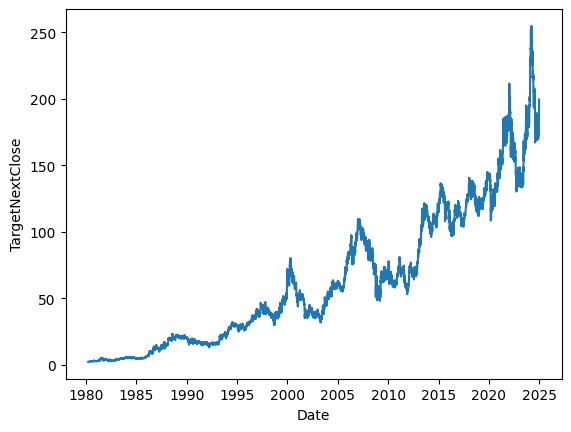

In [158]:
sns.lineplot(df2[['TargetNextClose']], x='Date', y='TargetNextClose')
plt.show()

In [159]:
df2['detrended'] = df2['TargetNextClose'] - df2['TargetNextClose'].shift(1)

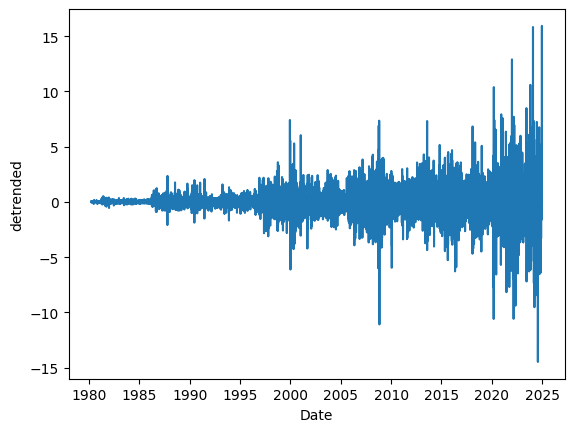

In [160]:
sns.lineplot(df2[['detrended']], x='Date', y='detrended')
plt.show()

In [ ]:
X = series_to_supervised(df2[['TargetNextClose']], n_in=365)
y = df2['TargetNextClose'].loc[X.index.min():]

In [148]:
X

,lag_10
Date,
1980-03-31,2.306134
1980-04-01,2.306134
1980-04-02,2.306134
1980-04-03,2.362154
1980-04-07,2.371490
...,...
2024-12-20,177.009995
2024-12-23,175.710007
2024-12-24,178.149994


In [157]:
df2[['TargetNextClose']].shift(10)

,TargetNextClose
Date,
1980-03-17,NaN
1980-03-18,NaN
1980-03-19,NaN
1980-03-20,NaN
1980-03-21,NaN
...,...
2024-12-20,177.009995
2024-12-23,175.710007
2024-12-24,178.149994


In [149]:
y

Date
1980-03-31      2.278124
1980-04-01      2.259452
1980-04-02      2.259452
1980-04-03      2.259452
1980-04-07      2.259452
                 ...    
2024-12-20    180.449997
2024-12-23    181.429993
2024-12-24    197.360001
2024-12-26    199.520004
2024-12-27    199.520004
Name: TargetNextClose, Length: 11281, dtype: float64

In [150]:
param_grid = {
    'max_depth': np.arange(2, 4).tolist(),
    'learning_rate': np.arange(.01, .1, .075).tolist(),
    'n_estimators': np.arange(100, 500, 200).tolist(),
    'gamma': np.arange(0.1, 5, 1).tolist(),
    'min_child_weight': np.arange(5, 20, 5).tolist()
}

grid_search = GridSearchCV(estimator=XGBRegressor(objective='reg:squarederror', random_state=42, alpha=1),
                           param_grid=param_grid,
                           cv=tscv,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1,
                           return_train_score=True,
                           verbose=True)

In [151]:
rmse_train_list = []
rmse_test_list = []

test_num = int(X.shape[0] * 0.90)

X_train = X.iloc[:test_num, :]
X_test = X.iloc[test_num:, :]
y_train = y.iloc[:test_num]
y_test = y.iloc[test_num:]

grid_search.fit(X_train,
                y_train
)
    
best_model = grid_search.best_estimator_

y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)


print(f"RMSE train: {root_mean_squared_error(y_train, y_train_pred)}")
print(f"RMSE Test: {root_mean_squared_error(y_test, y_test_pred)}")

Fitting 10 folds for each of 120 candidates, totalling 1200 fits
RMSE train: 2.733228383218007
RMSE Test: 38.80462812989336


In [152]:
#pd.DataFrame(grid_search.cv_results_).to_csv('cv_results_mike.csv')

In [153]:
grid_search.best_params_

{'gamma': 0.1,
 'learning_rate': 0.08499999999999999,
 'max_depth': 2,
 'min_child_weight': 10,
 'n_estimators': 300}

In [154]:
preds = best_model.predict(X)

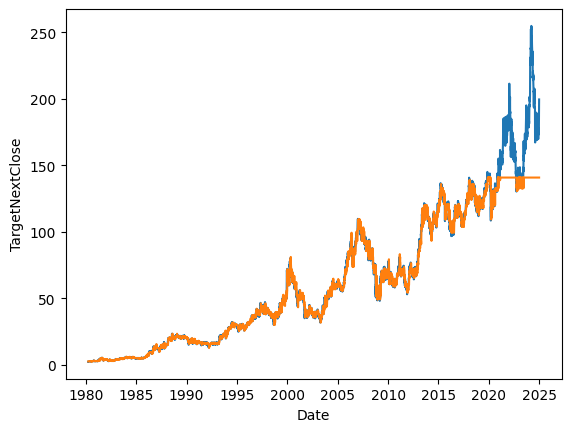

In [155]:
sns.lineplot(data=X, x='Date', y=y)
sns.lineplot(data=X, x='Date', y=preds)
plt.show()

In [ ]:
X

,Adj Close,Close,High,Low,Open,Volume,fed_funds_effective_rate,T10Y2Y,nikkei225_close_in_yen,japan_basic_discount_loan_rate,...,friday_flag,TargetNextClose,MA_5_adj_close,5_day_SD,RSI,MACD,Signal_Line,BB_Upper,BB_Middle,BB_Lower
Date,,,,,,,,,,,,,,,,,,,,,
1980-03-17,2.296798,3.291227,3.344743,3.291227,0.000000,41109,16.75,-2.24,6562.66,7.25,...,0,2.306134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-03-18,2.306134,3.304606,3.358122,3.304606,0.000000,9343,15.73,-2.02,6578.21,7.25,...,0,2.306134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-03-19,2.306134,3.304606,3.304606,3.304606,3.304606,0,15.59,-1.98,6584.76,9.00,...,0,2.306134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-03-20,2.306134,3.304606,3.358122,3.304606,0.000000,10277,16.83,-2.41,6584.76,9.00,...,0,2.362154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-03-21,2.362154,3.384880,3.438396,3.384880,0.000000,8409,17.68,-2.27,6571.77,9.00,...,0,2.371490,2.315471,0.026408,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-20,178.169998,178.169998,179.919998,175.839996,175.839996,425700,4.33,0.22,38701.90,0.50,...,0,180.449997,174.706000,1.979022,71.164408,0.447518,0.212408,178.582616,175.184285,171.785953
2024-12-23,180.449997,180.449997,180.619995,177.970001,179.119995,422700,4.33,0.29,39161.34,0.50,...,1,181.429993,175.945999,3.192322,78.616075,1.394288,0.507878,180.659547,175.691428,170.723309
2024-12-24,181.429993,181.429993,181.720001,180.830002,181.000000,168600,4.33,0.30,39036.85,0.50,...,0,197.360001,177.575998,3.551262,81.223115,2.092640,0.904068,182.886447,176.487141,170.087836


In [64]:
best_model

XGBRegressor(alpha=1, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=0.1, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.08499999999999999, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None, ...)

Terribly overfitting above